In [55]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
import Utils.utils as utils

df = pd.read_csv("/data/repor/analisys de datos/Data/Vino/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [56]:
# Normalice colums
import re
colums = df.columns.copy()
name_map = {}
for colum in colums:
    new_name  = re.sub(r'\s+', '_', str(colum)).rstrip('_')
    name_map.update({colum: new_name})

df.rename(columns=name_map, inplace=True)

In [57]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [58]:
print(f"Duplicate rows: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)

Duplicate rows: 240


In [59]:
df.corr().style.background_gradient(cmap='coolwarm')

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile_acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric_acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual_sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free_sulfur_dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total_sulfur_dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


In [60]:
#−1.0 to −0.7 Strong negative correlation
#−0.7 to −0.4 Negative correlation
#−0.4 to −0.2 Weak negative correlation
#−0.2 to +0.2 There is no correlation
#+0.2 to +0.4 Weak positive correlation
#+0.4 to +0.7 Positive correlation
#+0.7 to +1.0 Strong Positive correlation

In [69]:
# plt.figure(figsize=(10,10))
# ax = sns.heatmap(data=df.corr(method='spearman'), annot=True, cmap='coolwarm')
# ax.add_patch(patches.Rectangle((0,11),12,1,edgecolor='red',lw=3))
df.corr(method='spearman').style.background_gradient(cmap='coolwarm')

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.280162,0.657387,0.222396,0.244095,-0.157857,-0.083827,0.626628,-0.708560,0.220696,-0.062696,0.111693
volatile_acidity,-0.280162,1.000000,-0.610925,0.031299,0.170678,0.012162,0.092548,0.032264,0.245973,-0.324207,-0.225714,-0.387450
citric_acid,0.657387,-0.610925,1.000000,0.170096,0.110679,-0.059585,0.021124,0.344303,-0.558594,0.341512,0.090798,0.219427
residual_sugar,0.222396,0.031299,0.170096,1.000000,0.215528,0.077652,0.141515,0.414489,-0.091543,0.029702,0.112205,0.025749
chlorides,0.244095,0.170678,0.110679,0.215528,1.000000,0.010096,0.141324,0.420550,-0.234452,0.033630,-0.301525,-0.204360
free_sulfur_dioxide,-0.157857,0.012162,-0.059585,0.077652,0.010096,1.000000,0.789881,-0.025635,0.090857,0.041320,-0.099386,-0.058746
total_sulfur_dioxide,-0.083827,0.092548,0.021124,0.141515,0.141324,0.789881,1.000000,0.137455,-0.029526,-0.008333,-0.275353,-0.196620
density,0.626628,0.032264,0.344303,0.414489,0.420550,-0.025635,0.137455,1.000000,-0.322763,0.157787,-0.470019,-0.184302
pH,-0.708560,0.245973,-0.558594,-0.091543,-0.234452,0.090857,-0.029526,-0.322763,1.000000,-0.100048,0.183005,-0.042738
sulphates,0.220696,-0.324207,0.341512,0.029702,0.033630,0.041320,-0.008333,0.157787,-0.100048,1.000000,0.207636,0.380581


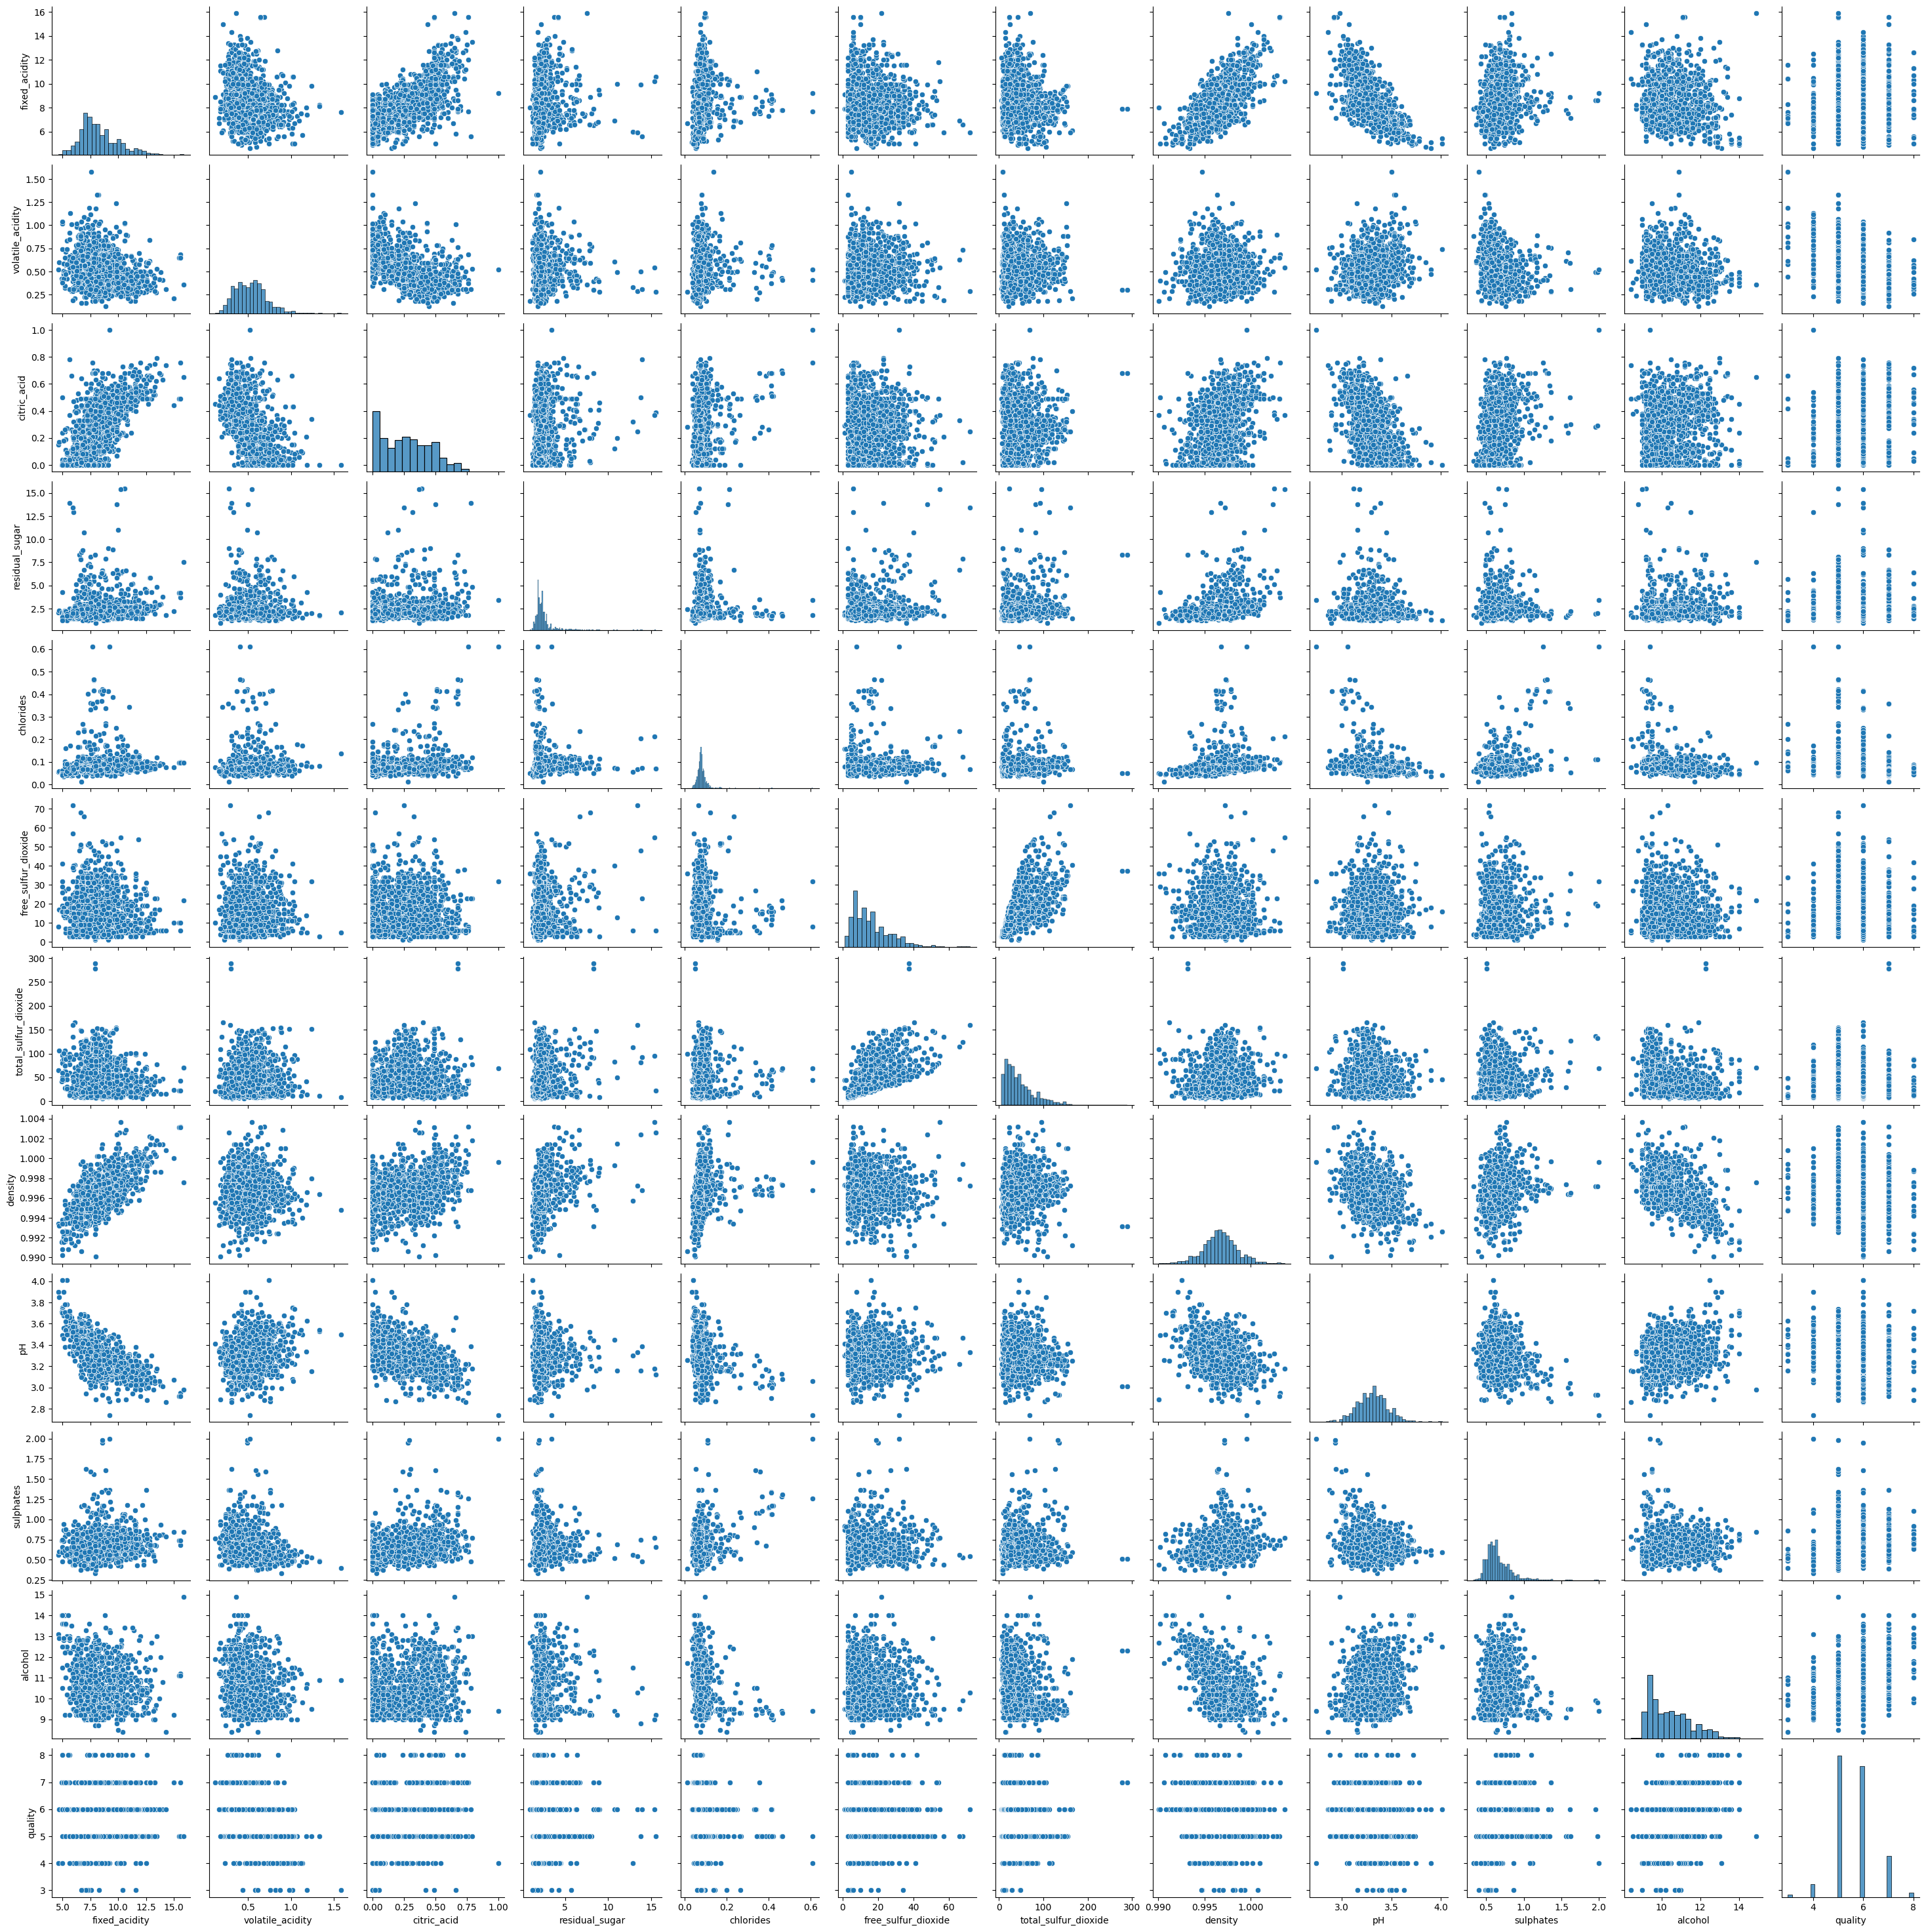

In [51]:
sns.pairplot(df)

Text(0.5, 0.98, 'Boxplot Distribution of All Collumns')

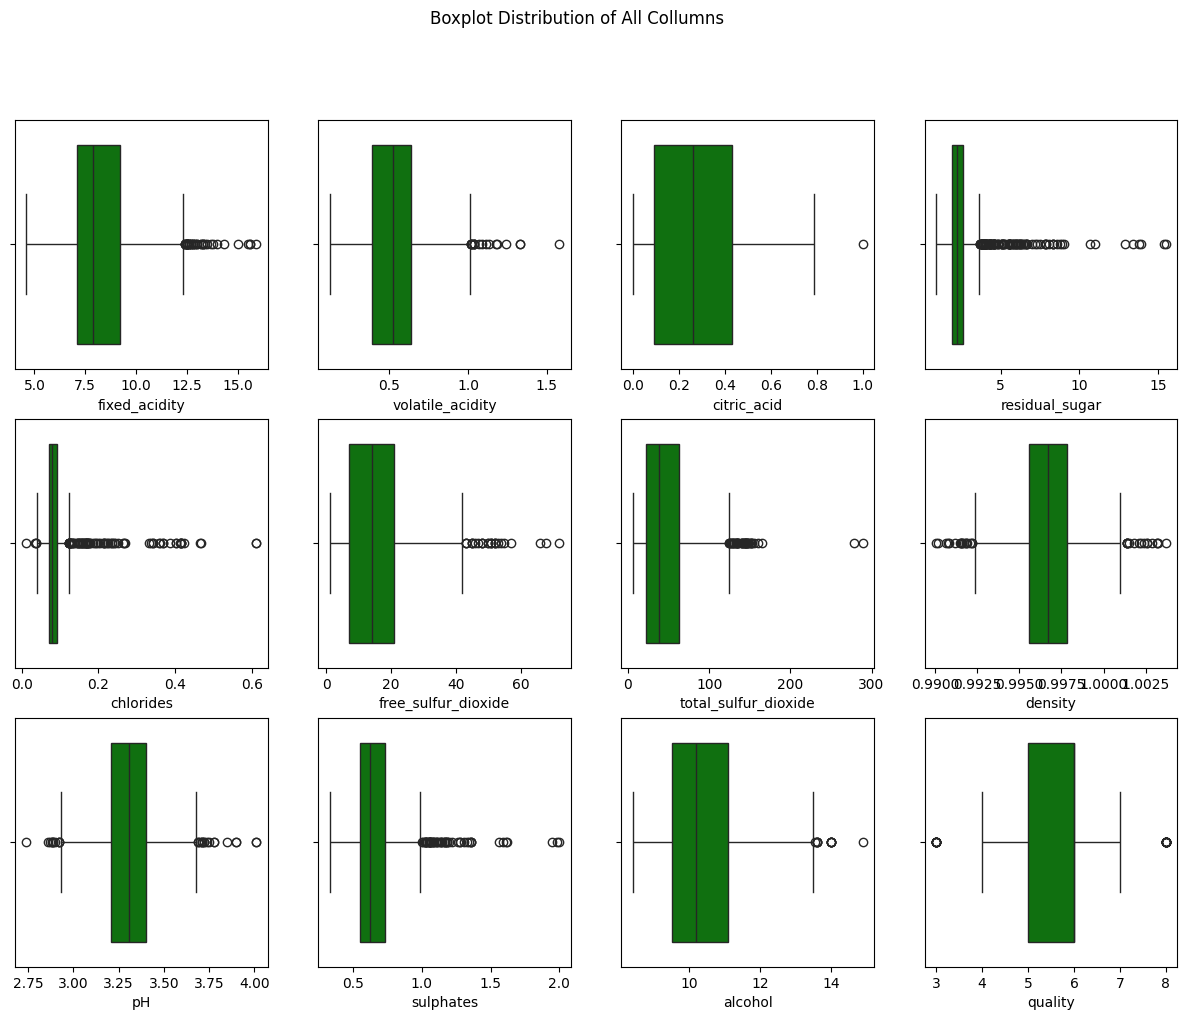

In [52]:


#Boxplot distribution
features = df.columns.tolist()
plt.figure(figsize=(15,11))
for i in range(0, len(features)):
  plt.subplot(3, 4, i+1)
  sns.boxplot(x=df[features[i]], color='green', orient='h')
plt.suptitle('Boxplot Distribution of All Collumns')



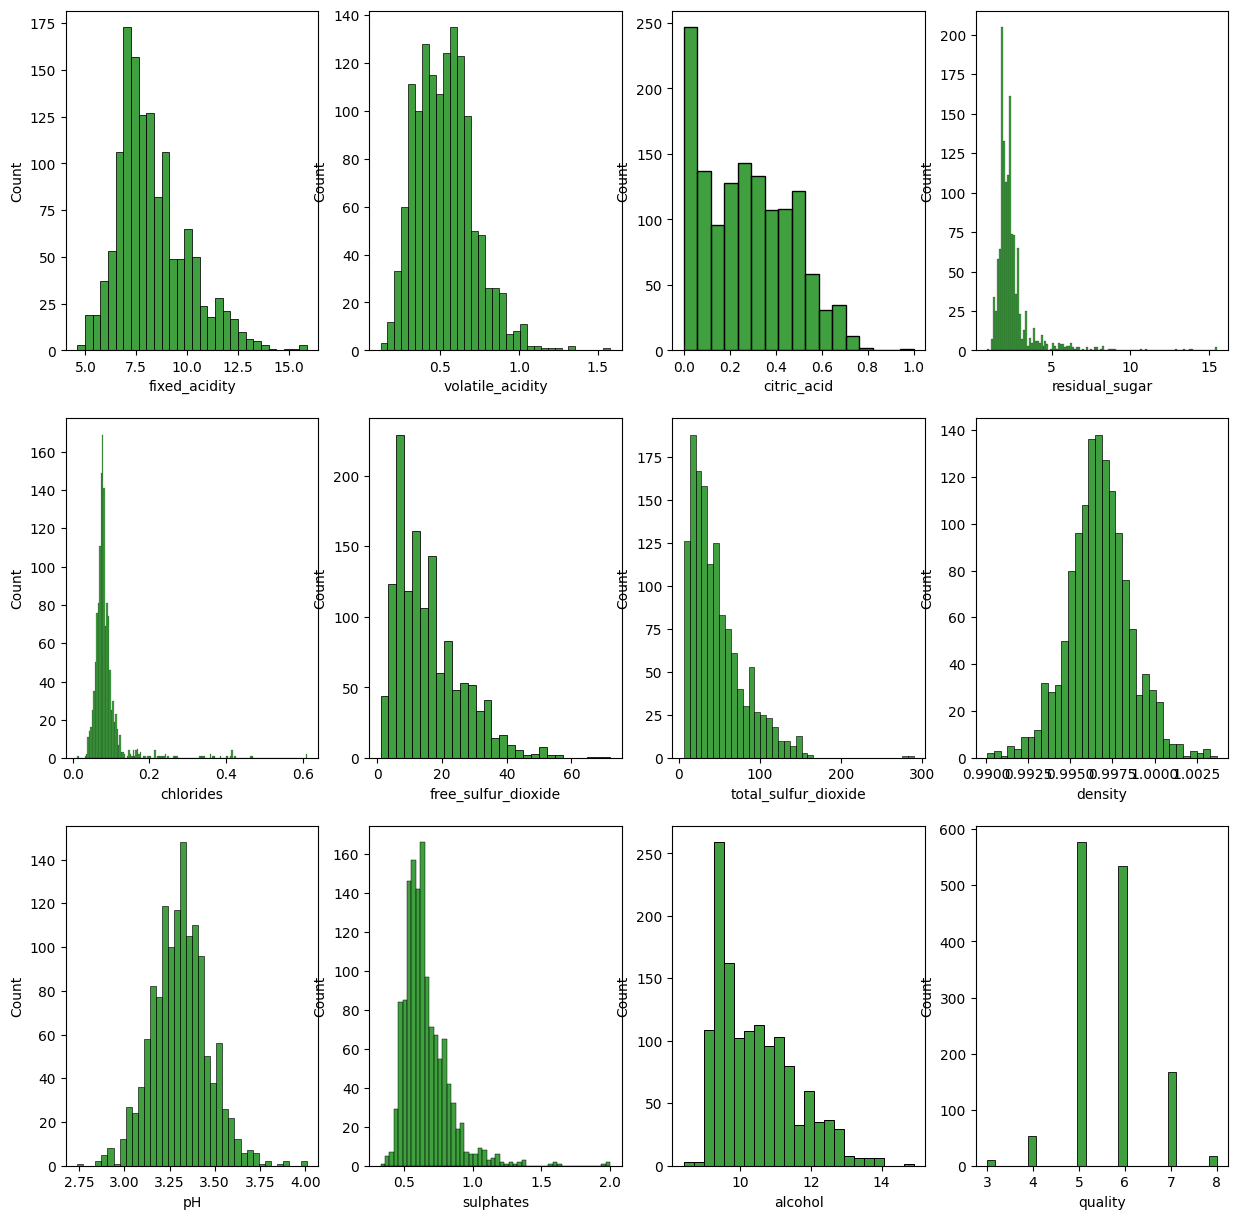

In [53]:
# hitogtrama
no_target = df.columns
plt.figure(figsize=(15,15))
for i in range(0, len(no_target)):
  plt.subplot(3, 4, i+1)
  ax = sns.histplot(x=df[no_target[i]], color='green')

In [54]:
# count outliers 
colums = df.columns
utils.count_outliers_IQR(df,colums)



,Colum,num_outliers,outlier_%
3,residual_sugar,126,9.271523
4,chlorides,87,6.401766
9,sulphates,55,4.047093
6,total_sulfur_dioxide,45,3.311258
0,fixed_acidity,41,3.016924
7,density,35,2.575423
8,pH,28,2.060338
11,quality,27,1.986755
5,free_sulfur_dioxide,26,1.913171
1,volatile_acidity,19,1.398087


In [24]:
colums = ["residual_sugar","chlorides"]
row_init = df.shape[0]
df = utils.remove_outliers_IQR(df, colums)
print(f"remove rows: {row_init-df.shape[0]}")

remove rows: 262


In [25]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,8.256619,0.522898,0.256866,2.187173,0.078122,15.723635,45.282723,0.996599,3.319678,0.645729,10.401720,5.644727
std,1.667222,0.175781,0.185626,0.445837,0.014128,9.712720,30.677006,0.001768,0.149213,0.152025,1.035011,0.787365
min,4.600000,0.120000,0.000000,0.900000,0.042000,1.000000,6.000000,0.990070,2.860000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.069000,8.000000,23.000000,0.995500,3.220000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.240000,2.100000,0.078000,14.000000,37.000000,0.996600,3.320000,0.620000,10.100000,6.000000
75%,9.100000,0.630000,0.400000,2.500000,0.086000,21.000000,60.000000,0.997610,3.410000,0.710000,11.000000,6.000000
max,15.000000,1.330000,0.750000,3.600000,0.117000,57.000000,165.000000,1.001400,3.900000,1.980000,14.000000,8.000000


In [26]:
# Random fores
# Splitting arrays or matrices into random train and test subsets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["quality"]), df['quality'], test_size = 0.20, random_state=48)

In [76]:
y_train_bin = y_train.apply(lambda x: 0 if x <= 5 else 1)
y_test_bin = y_test.apply(lambda x: 0 if x <= 5 else 1)

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score


models = []

models.append(("LogisticRegression",LogisticRegression(max_iter=10000)))
# models.append(("SVC",SVC(max_iter=4000)))
# models.append(("LinearSVC",LinearSVC(dual='auto', max_iter=40000)))
# models.append(("KNeighbors",KNeighborsClassifier()))
models.append(("DecisionTree",DecisionTreeClassifier()))
models.append(("RandomForest",RandomForestClassifier()))
rf2 = RandomForestClassifier(n_estimators=5, min_samples_split=2)
models.append(("RandomForest2",rf2))
# models.append(("MLPClassifier",MLPClassifier(solver='adam', random_state=0,max_iter=1000)))



results = []
names = []

fit_models = {}
for name,model in models:
    fit_model = model.fit(X_train, y_train_bin)
    result = cross_val_score(fit_model, X_test, y_test_bin,  cv=4)
    names.append(name)
    results.append(result)
    fit_models.update({name:{"model":fit_model, "mean": result.mean()}})

for i in range(len(names)):
    print(names[i],results[i].mean())

LogisticRegression 0.7462686567164178
DecisionTree 0.664179104477612
RandomForest 0.7201492537313433
RandomForest2 0.6902985074626866


In [42]:
a

[('fixed_acidity', 0.07538167761579488),
 ('volatile_acidity', 0.10766569881553889),
 ('citric_acid', 0.07648771140391342),
 ('residual_sugar', 0.057104465117784574),
 ('chlorides', 0.08440616681419051),
 ('free_sulfur_dioxide', 0.06909050851678175),
 ('total_sulfur_dioxide', 0.0951514210758601),
 ('density', 0.09381170292669255),
 ('pH', 0.07440815088708823),
 ('sulphates', 0.1211522809622944),
 ('alcohol', 0.14534021586406054)]